# Module 1 Project - Analyzing pCO$_2$ in Estuaries

In the Introduction to Ocean Acidification from Anthropogenic CO$_2$, we saw the relationship between pH and dissolved carbon dioxide near Hawaii. These samples were taking from open ocean and the data that you downloaded was pre-cleaned. We noted that the oscillations in the data are due to the seasonal changes that happen every year. 

In your project for Module 1, you will look at data from estuaries, rather than open ocean. In estuaries, the pCO2 and thus the pH are affected by more factors than just seasonal changes in temperature. We will explore the trends in pCO$_2$ variation over the year and how these trends depend on the specific estuary. 


### Data Provenance
Professor Karina Nielsen from SFSU and Dr. Curtis Bohlen, Director of the Casco Bay Estuaries Partnership, generously have provided their data, example analyses, and concept for this module's project.  We are grateful that they have shared their unpublished data with us!



### Background

Professor Nielsen took data from San Francisco Bay and provided us with a draft of the paper she and her collaborators are writing.

Paper Name:

"The objective of this paper is to describe and compare coastal acidification data from seven coastal systems around the United States in terms of typical values (i.e., median, range, etc..) seasonality, and co-variability to begin to understand natural variability in carbonate chemistry parameters within, and across a range of environmental settings."

We will take some time to read this paper in class. Please consider the following questions to guide your reading:

1.  s

2.   s

3.  ss

You will probably not have time to finish the manuscript in class, but will use it as a reference.

## Research Question

There are MANY plots included in the manuscript. In addition, Curtis has let me know that many more analyses and plots were generated, that were later not included!  (It is common to try many analyses until one gives the clearest picture of the story you are trying to tell.)

Your goal is to create plots to support or refute some of the claims that are taken directly from the manuscript:

1. "Results of year to multiyear monitoring across all water bodies show that temperature and pCO2 covaried and were lower in cooler, winter months and higher in warmer summer months, suggesting that part of the annual change in pCO2 was governed by seasonal temperature changes."


2. "Specifically, pCO2 increase began earlier in the year in warmer water, lower latitude GOM water bodies (Tampa Bay; Mission-Aransas Estuary) as compared with cooler water, higher latitude water bodies in the northeast (Barnegat Bay; Casco Bay) and upwelling-influenced west coast water bodies (Tillamook Bay, Santa Monica Bay; San Francisco Bay). Conversely, non-thermal processes, most notably the biogeochemical structure of coastal upwelling, appear to be largely responsible for the observed pCO2 values in west coast water bodies (Santa Monica Bay, San Francisco Bay and Tillamook Bay)."  --> Temperature and CO2 are LESS correlated in West Coast estuataries.

You plots may look similar to some of the plots in the manuscript. We will provide the code to help you with data wrangling and suggest plots that will help you investigate the above claims.

Instructions for your analyses and the requirements for your Report are given at the bottom of this notebook.


### Examples and some Instructions to aid in your Report

#### Required libraries

In [4]:
library(tidyverse)
library(readxl)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


#### Loading data

Creating a flexible file path and name reflects how Curtis organizes the data and code to work across different installations on different computers. If you are on SFSU's Jupyter Hub, the creation of the full file path should work correctly. On another computer, you can replace fpath with the path to the data file.

In [5]:
parent <- dirname(getwd())
sibfldnm <- 'data'
sibling  <- file.path(parent,sibfldnm)
fn    <- 'Data_6.12.2020_v2_REG_DELIVER.xlsx'
fpath <- file.path(sibling,fn)
#fpath <- '/Users/adelstein....'

[1] "/Users/adelstein/Documents/GitHub/GOLD806/all_class_resources/Module1-pHandCO2/data/Data_6.12.2020_v2_REG_DELIVER.xlsx"

Here we read in data from the data file. Curtis suggests to **skip** “TimeRoundMinutes” and the regression corrected versions of the data. Note that he specify the sheet holding the data.

In [6]:
all_data <- read_excel(fpath, sheet = "Data_6.12.2020_v2_REG_DELIVER",
                       col_types = c("text", "text", "date", 
                       "skip", "numeric", "numeric", "numeric", 
                       "numeric", "numeric", "numeric", 
                       "skip", "skip", "skip", "skip", "skip"))

I removed the "Season" column and changed the name of some data based on Curtis's suggestion. 

Rhetorical question: How could you look at all the data provided by the study's authors?

In [7]:
all_dataM <- all_data %>%
  rename_at(vars(contains('_meas')), list(~str_replace(., '_meas',''))) %>%
  rename(CO2Corr = CO2_Tcorr12) %>%
  select(-Season)

In the manuscript, sometimes the data from all the water bodies are shown together. Othertimes just one water body is analyzed/plotted. We are going to start by looking at just one or two water bodies. Thus we must extract that data and save it to a new dataframe. Below, I show the abreviations given to the different water body measurements. Make sure you can match each water body from the manuscript to its abv.

In [8]:
unique(all_dataM$WaterBody)

[1] "CBB"    "SMB_15" "SMB_60" "CB"     "TB"     "TillB"  "BB"     "SFB_1" 
[9] "SFB_15"

#### Example with Santa Monica Bay measurements at 15 meters.

Below is the code to extract just the data from the Santa Monica Bay taken at 15 meters depth. Statistical analyses are performed in the same code block. 

Important points and syntax to note:

1. I gave the data subset the name SMB15daily_data. You will copyd and edit this code to look at 1-2 other water bodies, so please rename your subset appropriately.

2. I use the function called **filter** to extract only the data labeled with SMB_15. How will you extract data from another water body?

3. In this data wrangling code, Curtis uses an 'advanced' technique called **piping**. A pipe is indicated by <code> %>% </code> and allows the output of one function to be passed along as input into another function. 

4. Finally, note where Curtis does the statistical analyses in the block **summarise_at**. For all the measurements (temperature, salinity, pCO2, corrected pCO2, pH, and dissolved oxygen) the sum, median, range, and 95th quantile are calculated. Find where he notes what the function **summarise_at** does.

In [9]:
# Wrangling to get box plots from all estuaries
SMB15daily_data <- all_dataM %>%
  filter(WaterBody == 'SMB_15') %>%
  # first, create a variable that is JUST the date.
  mutate(theDate = as.Date(DateTime)) %>%
  select(-DateTime) %>%
  group_by(theDate) %>%
  
  # by default, summarize_at creates new variable names like "CO2_n" and "CO2_r"
  # that's why I used short variable names here.
  summarise_at(c("Temp", "Sal", "CO2", "CO2Corr", "pH","DO"),
               c(n     = function(x) sum(! is.na(x)),
                 m    = function(x) median(x, na.rm=TRUE),
                 r    = function(x) {suppressWarnings(max(x, na.rm=TRUE) -
                                                        min(x, na.rm=TRUE))},
                #iqr   = function(x) IQR(x, na.rm=TRUE),
                p90r  = function(x) {as.numeric(quantile(x, 0.95, na.rm=TRUE) -
                        quantile(x, 0.05, na.rm=TRUE))})) %>%
  
  # Finally, I create year and month labels
  mutate(yyyy = as.numeric(format(theDate, format = '%Y')),
         dd   = as.numeric(format(theDate, format = '%d')),
         doy  = as.numeric(format(theDate, format = '%j')),
         mm   = as.numeric(format(theDate, format = '%m')),
         Month = factor(mm, levels=1:12, labels = month.abb)
         )

After doing analyses, it is good practice to view some of the data to make sure it came out as expected. The first time I (Nicole) tried Curtis's code, my data came out blank and I had to fix a typo!

Now all the measurements have a daily mean, range, *ect*. In the manuscript, some plots show the seasonal means. After you get more familiar with data wrangling, you could figure out how to changed the code to **group_by** Season rather than the Date!

In [10]:
head(SMB15daily_data)

theDate,Temp_n,Sal_n,CO2_n,CO2Corr_n,pH_n,DO_n,Temp_m,Sal_m,CO2_m,...,Sal_p90r,CO2_p90r,CO2Corr_p90r,pH_p90r,DO_p90r,yyyy,dd,doy,mm,Month
2016-07-25,11,0,10,10,0,0,16.860,NA,393.85,...,NA,55.285,78.28355,NA,NA,2016,25,207,7,Jul
2016-07-26,24,0,24,24,0,0,17.390,NA,393.25,...,NA,76.485,98.17892,NA,NA,2016,26,208,7,Jul
2016-07-27,24,0,24,24,0,0,15.340,NA,452.15,...,NA,110.980,145.04184,NA,NA,2016,27,209,7,Jul
2016-07-28,24,0,24,24,0,0,14.255,NA,491.45,...,NA,144.755,167.36353,NA,NA,2016,28,210,7,Jul
2016-07-29,24,0,23,23,0,0,14.590,NA,454.10,...,NA,94.110,107.55129,NA,NA,2016,29,211,7,Jul
2016-07-30,24,0,24,24,0,0,14.450,NA,421.40,...,NA,134.680,166.86220,NA,NA,2016,30,212,7,Jul


### Examples of plots

#### Claim 1 - Relationship between pCO2 and temperature by Month

We suggest using a boxplot to show that pCO2 is lower cooler winter months for your given water body. This plot will help you investigate claim 1. 

We will give you an example to visualize the temperature measurements taken from each month. You can edit this example to show the pCO2. 

While you could simply plot the mean temperature from each month, it's more interesting to show more information using a boxplot. We will use the ggplot geom_boxplot function. 

Recall that aes stands for aesthetic and is a way to assign (or map) data onto a variable. In this case, aes maps Month onto the x axis. 

Also remember that I am showing you data from Santa Monica Bay (SMB15)

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

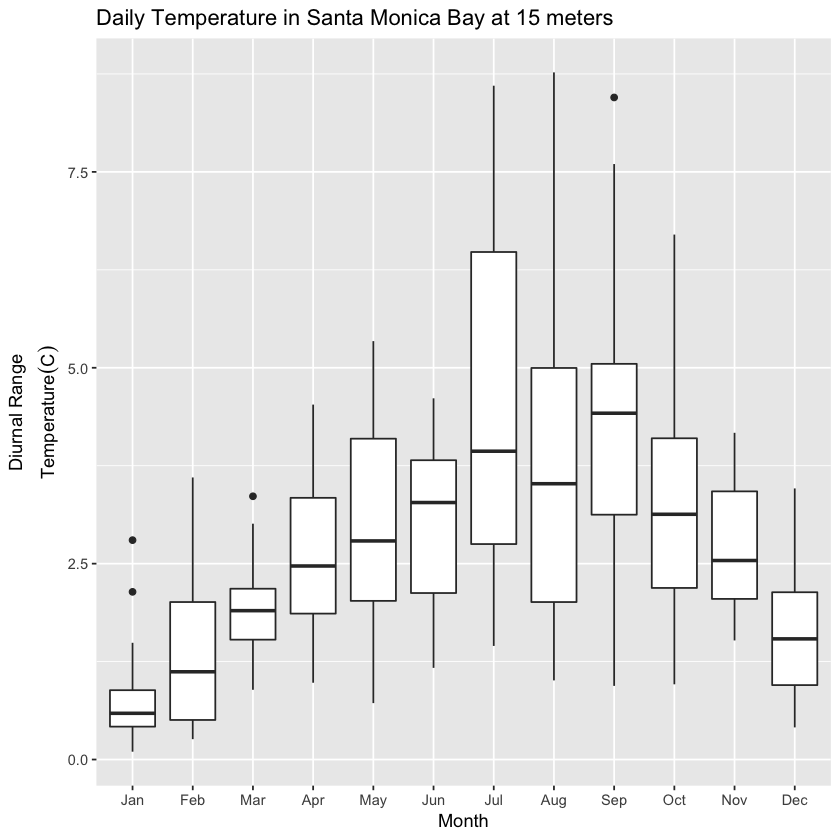

In [14]:
#Example plot (ignore warnings if plot shows up)
ggplot(SMB15daily_data, aes(x=Month)) +
 geom_boxplot(aes(y= Temp_r)) +
 xlab('Month') + 
 ylab(expression(atop("Diurnal Range", Temperature (C)))) +
 ggtitle("Daily Temperature in Santa Monica Bay at 15 meters")

In your report, you will use geom_boxplot and the wrangled data above show the range of CO2 for every Month.

As expected, temperature is higher in the summer months! In addition, the range of temperatures measured is larger as the mean temperature increases. Another way to show the positive correlation between range and median is using a scatter plot. The code below includes a trend line using the syntax **geom_smooth**, which uses a Loess smoother. If you are curious, you can read about a Loess smoother and other trend lines available in R. 

Some syntax to note in the code below:

1. In the y-axis label some fancy formatting is done to enable the Greek letter $\mu$, which stands for micro. 

2. No additional information is given in the geom_point function, but you could use aes to map a different color to each month. 

Look up the syntax for that mapping in the geom_point function and see if you can edit the code below!

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 47 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 47 rows containing missing values (geom_point).”

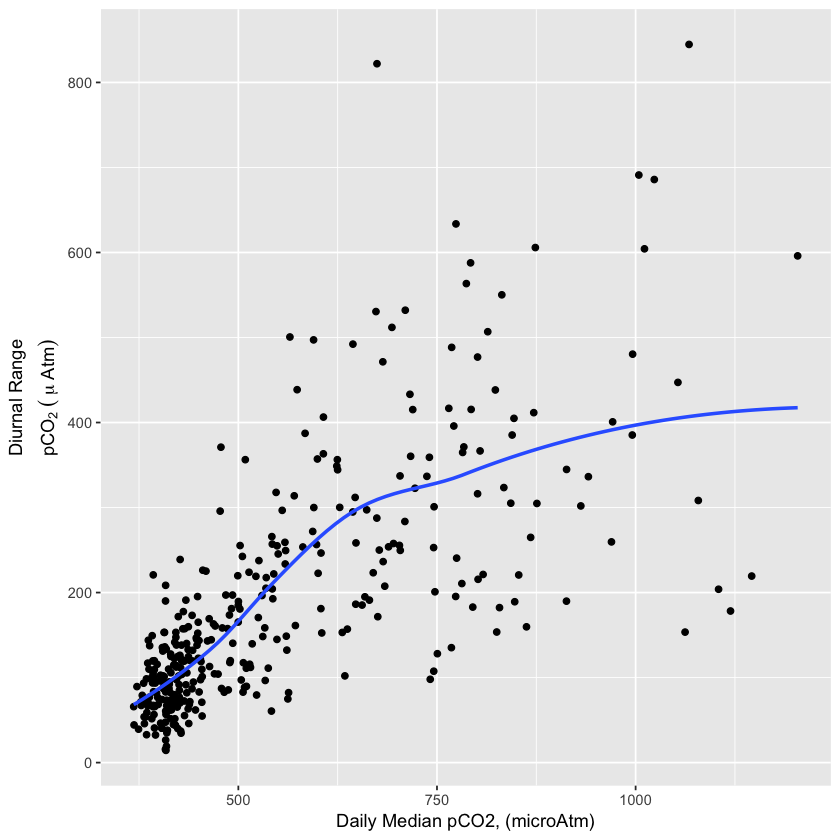

In [17]:
ggplot(SMB15daily_data, aes(x = CO2_m, y=CO2_r)) + geom_point() + 
 geom_smooth(se=FALSE) +
 xlab("Daily Median pCO2, (microAtm)") + 
 ylab(expression(atop("Diurnal Range", pCO[2]~(~mu~Atm))))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 47 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 47 rows containing missing values (geom_point).”

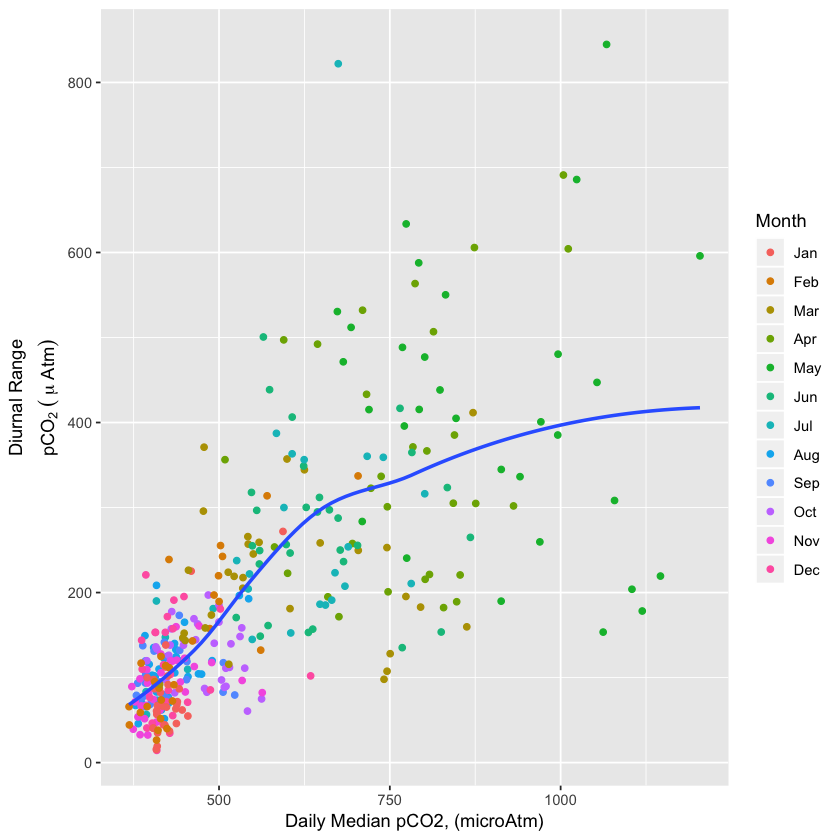

In [19]:
# NOT IN KEY
ggplot(SMB15daily_data, aes(x = CO2_m, y=CO2_r)) + geom_point(aes(color = Month)) + 
 geom_smooth(se=FALSE) +
 xlab("Daily Median pCO2, (microAtm)") + 
 ylab(expression(atop("Diurnal Range", pCO[2]~(~mu~Atm))))

#### Claim 2 - Temperature and pCO$_2$ are less correlated in West Coast water bodies. 

In claim 2, the goal is to compare West Coast water bodies to East Coast water bodies. To start, you will pick ONE West Coast estuary and ONE East Coast estuary. Then plot pCO$_2$ versus temperature in a scatterplot (map Month to color for improved visualization).

It would be nice to plot analyses of the two different water bodies SIDE by SIDE, which can be done using **facet_wrap**!

You will look up facet_wrap with your team and implement it in your report. One hint: the argument of facet_wrap has to be ~WaterBody, so that the plots are separated by the different estuaries. 

In order to use facet_wrap, you need to create a data frame that contains data from BOTH water bodies. The code for that wrangling is below. I am going to compare the Santa Monica Bay data at 15 versus 60 meters, but you are going to compare two different estuaries. 

Note

1. I **group_by** WaterBody and theDate. 

2. I use the syntax <code> | </code>, which is the **OR** operator. I  filter for data assigned to the water body SMB_15 OR SMB_60.

In [20]:
# Wrangling to get box plots from TWO estuaries
compare_daily_data <- all_dataM %>%
  filter(WaterBody == 'SMB_15' | WaterBody == 'SMB_60' ) %>%
  # first, create a variable that is JUST the date.
  mutate(theDate = as.Date(DateTime)) %>%
  select(-DateTime) %>%
  group_by(WaterBody, theDate) %>%
  
  # by default, summarize_at creates new variable names like "CO2_n" and "CO2_r"
  # that's why I used short variable names here.
  summarise_at(c("Temp", "Sal", "CO2", "CO2Corr", "pH","DO"),
               c(n     = function(x) sum(! is.na(x)),
                 m    = function(x) median(x, na.rm=TRUE),
                 r    = function(x) {suppressWarnings(max(x, na.rm=TRUE) -
                                                        min(x, na.rm=TRUE))},
                #iqr   = function(x) IQR(x, na.rm=TRUE),
                p90r  = function(x) {as.numeric(quantile(x, 0.95, na.rm=TRUE) -
                        quantile(x, 0.05, na.rm=TRUE))})) %>%
  
  # Finally, I create year and month labels
  mutate(yyyy = as.numeric(format(theDate, format = '%Y')),
         dd   = as.numeric(format(theDate, format = '%d')),
         doy  = as.numeric(format(theDate, format = '%j')),
         mm   = as.numeric(format(theDate, format = '%m')),
         Month = factor(mm, levels=1:12, labels = month.abb)
         )

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 47 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 47 rows containing missing values (geom_point).”

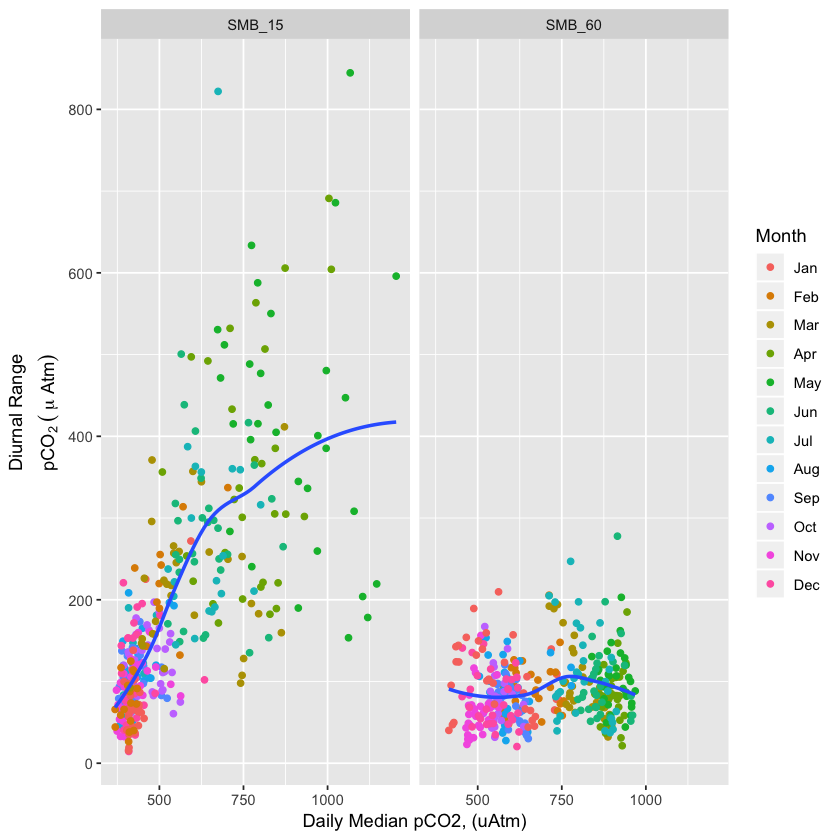

In [21]:
#Not in KEY?
ggplot(compare_daily_data, aes(x = CO2_m, y=CO2_r)) + 
 geom_point(aes(color = Month)) + 
 geom_smooth(se=FALSE) +
 xlab("Daily Median pCO2, (uAtm)") + 
 ylab(expression(atop("Diurnal Range", pCO[2]~(~mu~Atm)))) +
 facet_wrap(~WaterBody, ncol=2)


Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

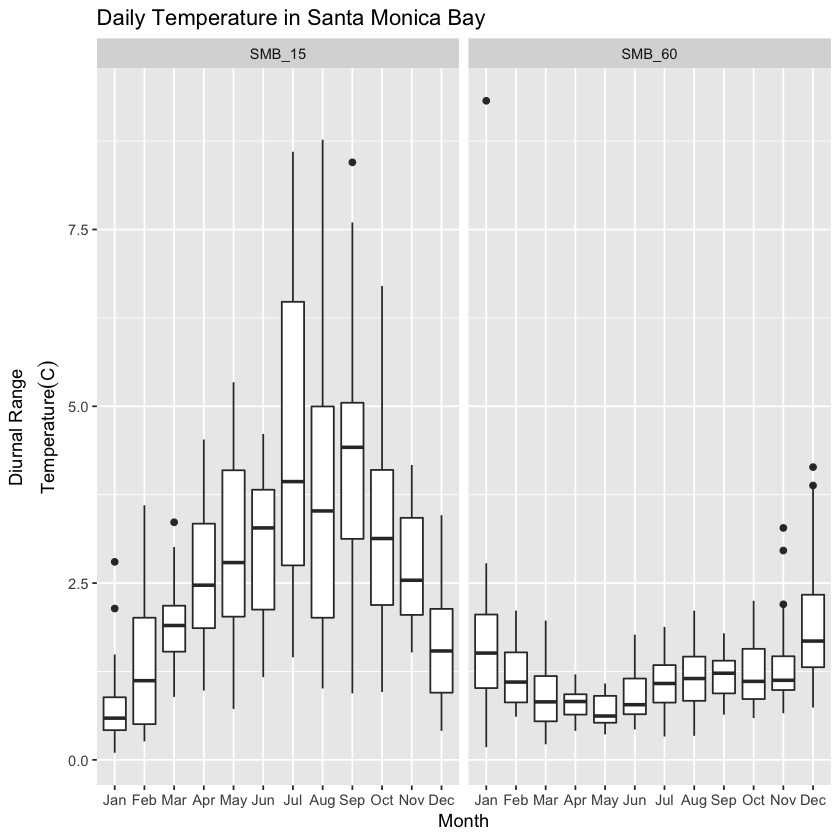

In [23]:
#Not in KEY?
ggplot(compare_daily_data, aes(x = Month)) + 
 geom_boxplot(aes(y= Temp_r)) + 
 xlab('Month') + 
 ylab(expression(atop("Diurnal Range", Temperature (C)))) +
 ggtitle("Daily Temperature in Santa Monica Bay") +
 facet_wrap(~WaterBody, ncol=2)


That's the end of the examples and hints from this notebook. Please ask for advice and more hints if you get stuck while working with your team!

## Report

Work together with your team to complete your report. 

Team member names:

((However, please turn your own report and responses.))

The requirements for completing your Report are to to support or refute two claims from the manuscrtip, restated here:

1. "Results of year to multiyear monitoring across all water bodies show that temperature and pCO2 covaried and were lower in cooler, winter months and higher in warmer summer months, suggesting that part of the annual change in pCO2 was governed by seasonal temperature changes."


2. "Specifically, pCO2 increase began earlier in the year in warmer water, lower latitude GOM water bodies (Tampa Bay; Mission-Aransas Estuary) as compared with cooler water, higher latitude water bodies in the northeast (Barnegat Bay; Casco Bay) and upwelling-influenced west coast water bodies (Tillamook Bay, Santa Monica Bay; San Francisco Bay). Conversely, non-thermal processes, most notably the biogeochemical structure of coastal upwelling, appear to be largely responsible for the observed pCO2 values in west coast water bodies (Santa Monica Bay, San Francisco Bay and Tillamook Bay)."  --> Temperature and CO2 are LESS correlated in West Coast estuataries.

Pick ONE estuary from the East Coast and ONE estuary from the West Coast to compare. 

Create plots and write some paragraphs describing how the plots support or refute the claims. 

Given time, you could TRY comparing various estuaries and then select TWO to present in your report. 

You could also include plots of ALL the estuaries using all_dataM and facet_wrap. However, it is easier to start by explaning the differences between TWO plots than summarizing the trends amoung all the estuaries. 

Include two separate sections of your report, one for each claim. You can write your report here (below all the examples). Or you can create a separate notebook for report. If you have a separate report, make sure your Report can be "run", so includes all the necessary code and libraries to import and wrangle the data.

If you wish to include other interesting results from your analyses, please do and describe what you found!

Include an Introduction in your Report. Describe the motivation and goal of the analyses and which two estuaries that you chose to compare.

#### Comparing Casco Bay and San Francisco Bay

In [25]:
# Wrangling to get box plots from TWO estuaries
compare_daily_data2 <- all_dataM %>%
  filter(WaterBody == 'CB' | WaterBody == 'SFB_1' ) %>%
  # first, create a variable that is JUST the date.
  mutate(theDate = as.Date(DateTime)) %>%
  select(-DateTime) %>%
  group_by(WaterBody, theDate) %>%
  
  # by default, summarize_at creates new variable names like "CO2_n" and "CO2_r"
  # that's why I used short variable names here.
  summarise_at(c("Temp", "Sal", "CO2", "CO2Corr", "pH","DO"),
               c(n     = function(x) sum(! is.na(x)),
                 m    = function(x) median(x, na.rm=TRUE),
                 r    = function(x) {suppressWarnings(max(x, na.rm=TRUE) -
                                                        min(x, na.rm=TRUE))},
                #iqr   = function(x) IQR(x, na.rm=TRUE),
                p90r  = function(x) {as.numeric(quantile(x, 0.95, na.rm=TRUE) -
                        quantile(x, 0.05, na.rm=TRUE))})) %>%
  
  # Finally, I create year and month labels
  mutate(yyyy = as.numeric(format(theDate, format = '%Y')),
         dd   = as.numeric(format(theDate, format = '%d')),
         doy  = as.numeric(format(theDate, format = '%j')),
         mm   = as.numeric(format(theDate, format = '%m')),
         Month = factor(mm, levels=1:12, labels = month.abb)
         )

#### Box plots to consider pCO2 versus Month - Claim 1

Warning message:
“Removed 283 rows containing non-finite values (stat_boxplot).”

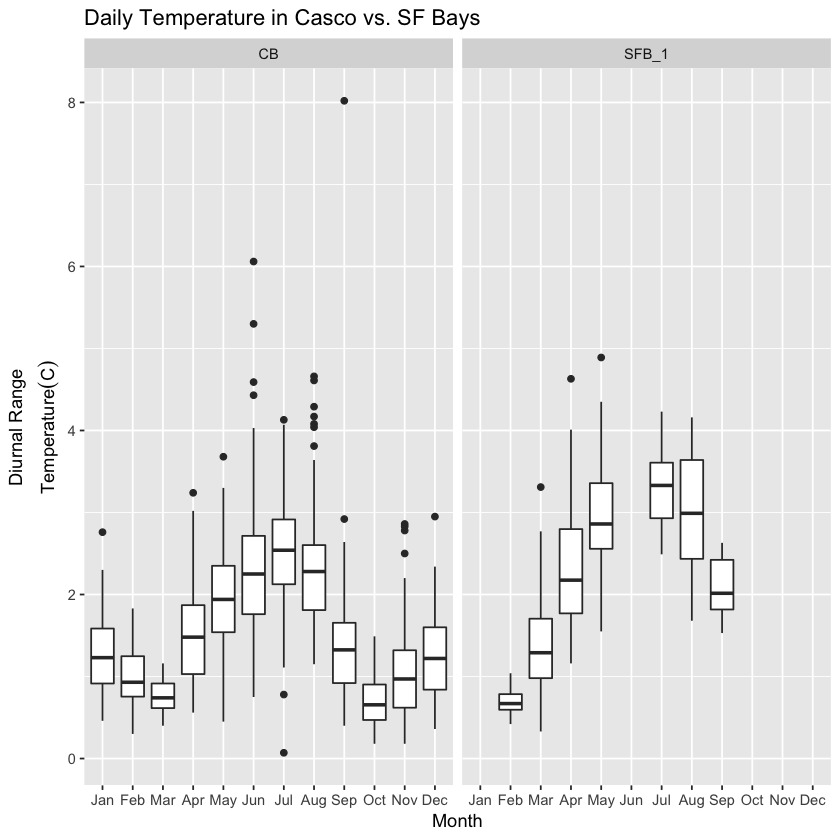

In [29]:
ggplot(compare_daily_data2, aes(x = Month)) + 
 geom_boxplot(aes(y= Temp_r)) + 
 xlab('Month') + 
 ylab(expression(atop("Diurnal Range", Temperature (C)))) +
 ggtitle("Daily Temperature in Casco vs. SF Bays") +
 facet_wrap(~WaterBody, ncol=2)


Warning message:
“Removed 409 rows containing non-finite values (stat_boxplot).”

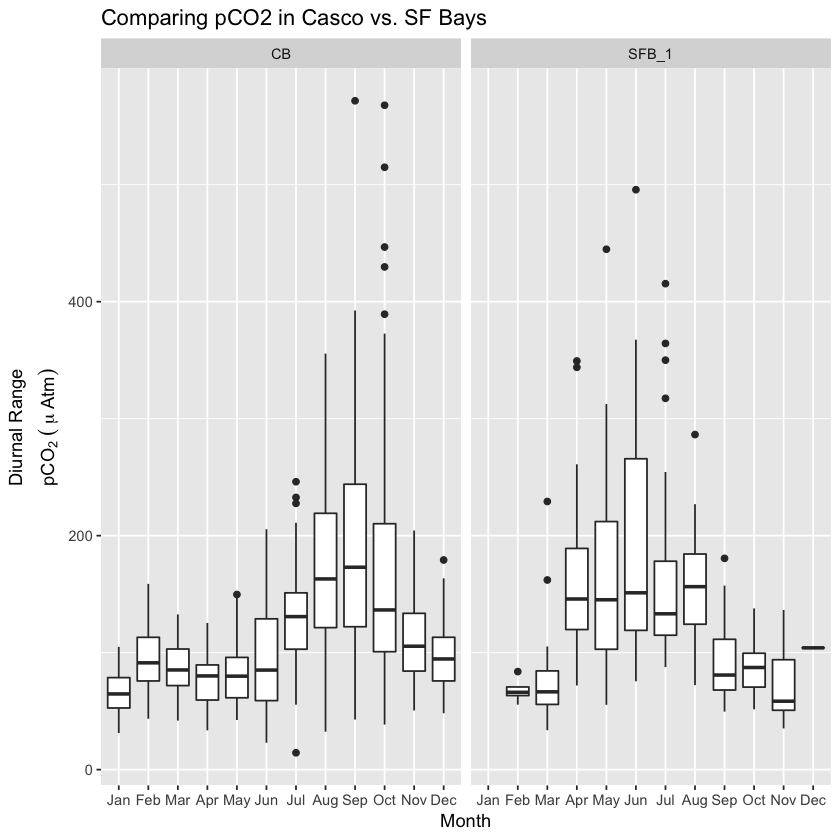

In [30]:
ggplot(compare_daily_data2, aes(x = Month)) + 
 geom_boxplot(aes(y= CO2_r)) + 
 xlab('Month') + 
 ylab(expression(atop("Diurnal Range", pCO[2]~(~mu~Atm)))) +
 ggtitle("Comparing pCO2 in Casco vs. SF Bays") +
 facet_wrap(~WaterBody, ncol=2)


It seems that pCO2 in SF Bay is higher in April-August, with a similar median temperature. The temperature is highest in July, but pCO2 is not! Let's see the scatter plots. 

#### Plotting pCO2 versus temperature

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 533 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 533 rows containing missing values (geom_point).”

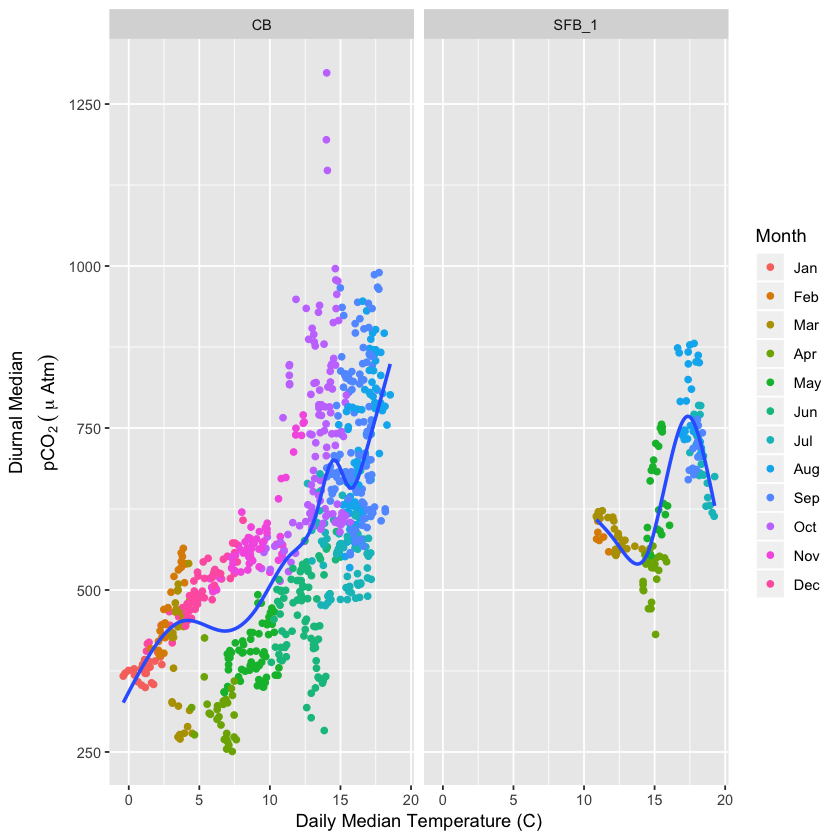

In [44]:
#Not in KEY?
ggplot(compare_daily_data2, aes(Temp_m, CO2_m)) + 
 geom_point(aes(color = Month)) + 
 geom_smooth(se=FALSE) +
 ylab(expression(atop("Diurnal Median", pCO[2]~(~mu~Atm)))) +
 xlab('Daily Median Temperature (C)') +
 facet_wrap(~WaterBody, ncol=2)


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 533 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 283 rows containing missing values (geom_point).”

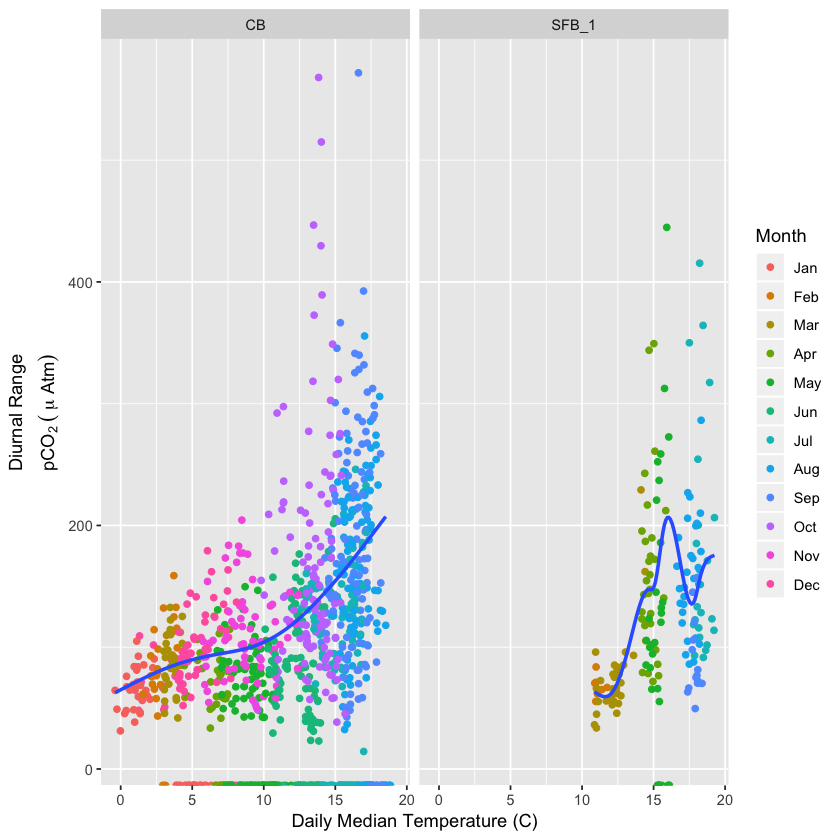

In [45]:
#Not in KEY?
ggplot(compare_daily_data2, aes(Temp_m, CO2_r)) + 
 geom_point(aes(color = Month)) + 
 geom_smooth(se=FALSE) +
 ylab(expression(atop("Diurnal Range", pCO[2]~(~mu~Atm)))) +
 xlab('Daily Median Temperature (C)') +
 facet_wrap(~WaterBody, ncol=2)


In [36]:
names(compare_daily_data2)

[1] "WaterBody"    "theDate"      "Temp_n"       "Sal_n"        "CO2_n"       
 [6] "CO2Corr_n"    "pH_n"         "DO_n"         "Temp_m"       "Sal_m"       
[11] "CO2_m"        "CO2Corr_m"    "pH_m"         "DO_m"         "Temp_r"      
[16] "Sal_r"        "CO2_r"        "CO2Corr_r"    "pH_r"         "DO_r"        
[21] "Temp_p90r"    "Sal_p90r"     "CO2_p90r"     "CO2Corr_p90r" "pH_p90r"     
[26] "DO_p90r"      "yyyy"         "dd"           "doy"          "mm"          
[31] "Month"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 533 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 533 rows containing missing values (geom_point).”

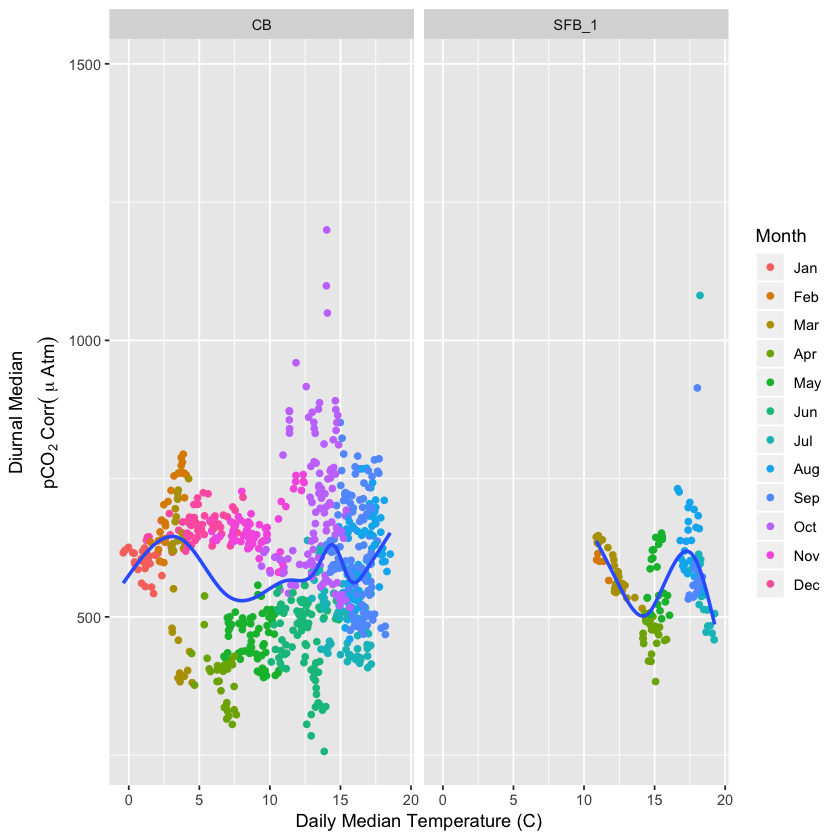

In [47]:
#Not in KEY?
ggplot(compare_daily_data2, aes(Temp_m, CO2Corr_m)) + 
 geom_point(aes(color = Month)) + 
 geom_smooth(se=FALSE) +
 ylab(expression(atop("Diurnal Median", pCO[2]~Corr(~mu~Atm)))) +
 xlab('Daily Median Temperature (C)') +
 facet_wrap(~WaterBody, ncol=2)


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 533 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 283 rows containing missing values (geom_point).”

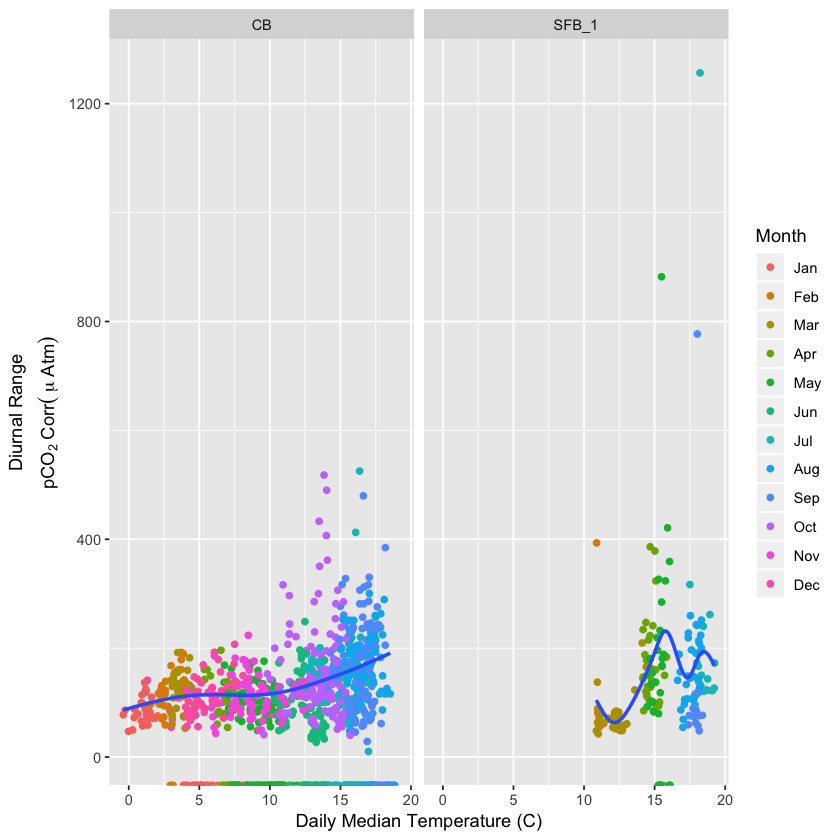

In [48]:
#Not in KEY?
ggplot(compare_daily_data2, aes(Temp_m, CO2Corr_r)) + 
 geom_point(aes(color = Month)) + 
 geom_smooth(se=FALSE) +
 ylab(expression(atop("Diurnal Range", pCO[2]~Corr(~mu~Atm)))) +
 xlab('Daily Median Temperature (C)') +
 facet_wrap(~WaterBody, ncol=2)


#### Comparing all estuaries

In [54]:
daily_data <- all_dataM %>%
  # first, create a variable that is JUST the date.
  mutate(theDate = as.Date(DateTime)) %>%
  select(-DateTime) %>%
  group_by(WaterBody, theDate) %>%
  
  # by default, summarize_at creates new variable names like "CO2_n" and "CO2_r"
  # that's why I used short variable names here.
  summarise_at(c("Temp", "CO2", "CO2Corr", "pH"),
               c(n     = function(x) sum(! is.na(x)),
                 m    = function(x) median(x, na.rm=TRUE),
                 r    = function(x) {suppressWarnings(max(x, na.rm=TRUE) -
                                                        min(x, na.rm=TRUE))},
                #iqr   = function(x) IQR(x, na.rm=TRUE),
                p90r  = function(x) {as.numeric(quantile(x, 0.95, na.rm=TRUE) -
                        quantile(x, 0.05, na.rm=TRUE))})) %>%
  
  # Finally, I create year and month labels
  mutate(yyyy = as.numeric(format(theDate, format = '%Y')),
         mm   = as.numeric(format(theDate, format = '%m')),
         Month = factor(mm, levels=1:12, labels = month.abb)
         ) %>%
  select(-mm)

Warning message:
“Removed 1302 rows containing non-finite values (stat_boxplot).”

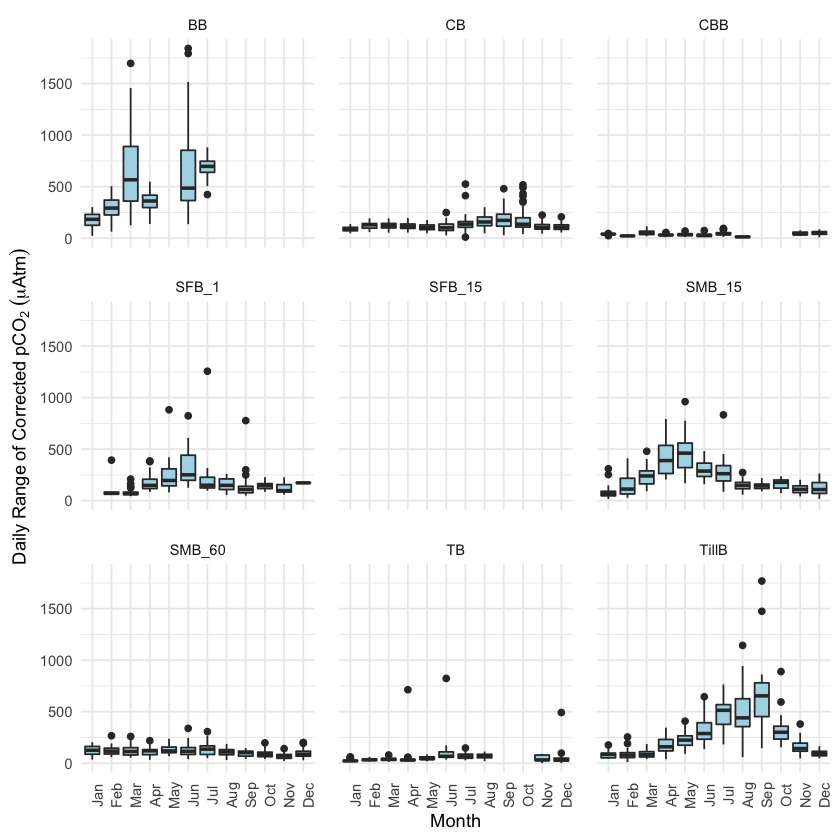

In [50]:
plt <- daily_data %>%
  select_at(vars(contains('CO2Corr'), WaterBody, Month)) %>%
  filter(! is.na(CO2Corr_r) & ! is.na(Month)) %>%

  ggplot(aes(x=Month, y= CO2Corr_r)) +
  geom_boxplot(fill = 'lightblue') +
  
  xlab('Month') +
  ylab(expression (Daily~Range~of~Corrected~pCO[2]~(mu*Atm))) +
  
  theme_minimal() +
  theme(axis.text.x=element_text(angle=90)) +
  theme(panel.spacing = unit(1, "lines")) +
  
  facet_wrap(~WaterBody, ncol=3)
plt

Warning message in self$trans$transform(x):
“NaNs produced”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 1304 rows containing non-finite values (stat_boxplot).”

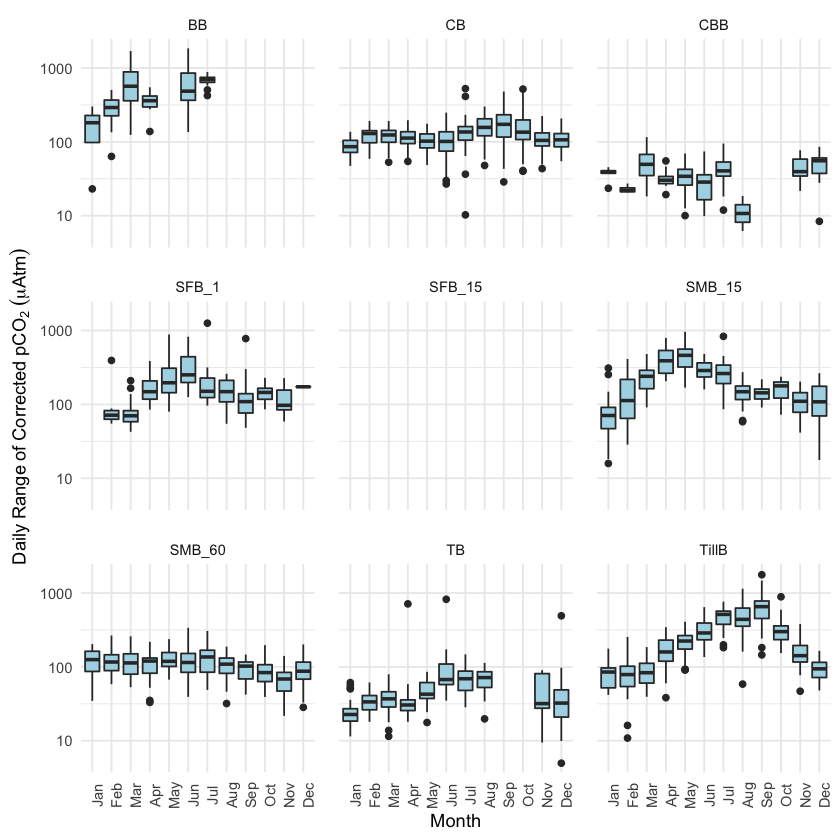

In [51]:
plt + scale_y_log10()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 1445 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 308 rows containing missing values (geom_point).”

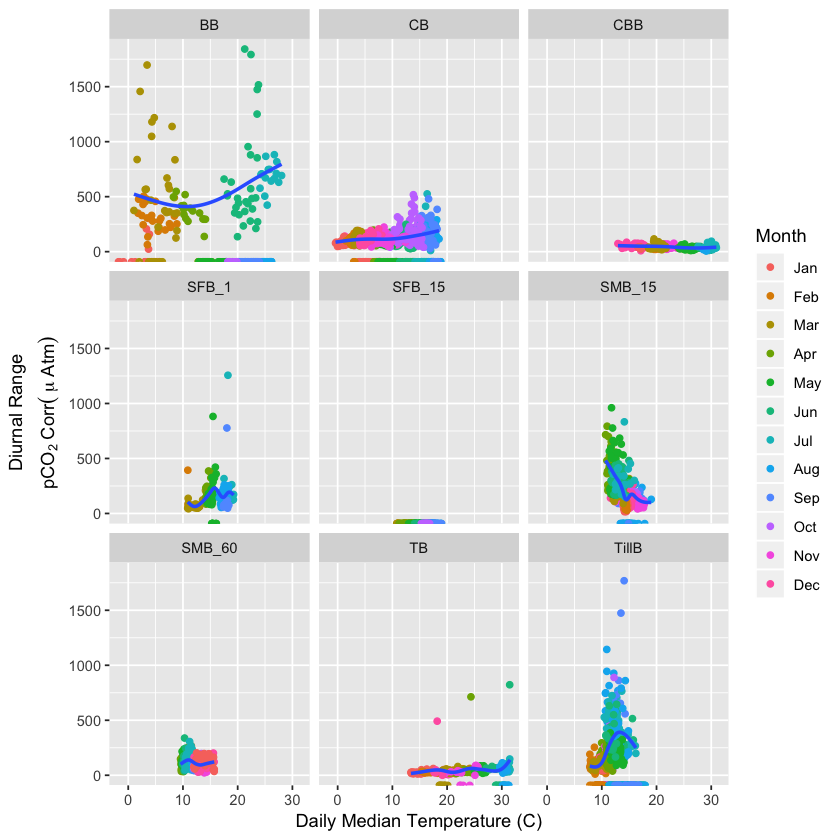

In [55]:
ggplot(daily_data, aes(Temp_m, CO2Corr_r)) + 
 geom_point(aes(color = Month)) + 
 geom_smooth(se=FALSE) +
 ylab(expression(atop("Diurnal Range", pCO[2]~Corr(~mu~Atm)))) +
 xlab('Daily Median Temperature (C)') +
 facet_wrap(~WaterBody, ncol=3)


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 1445 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1445 rows containing missing values (geom_point).”

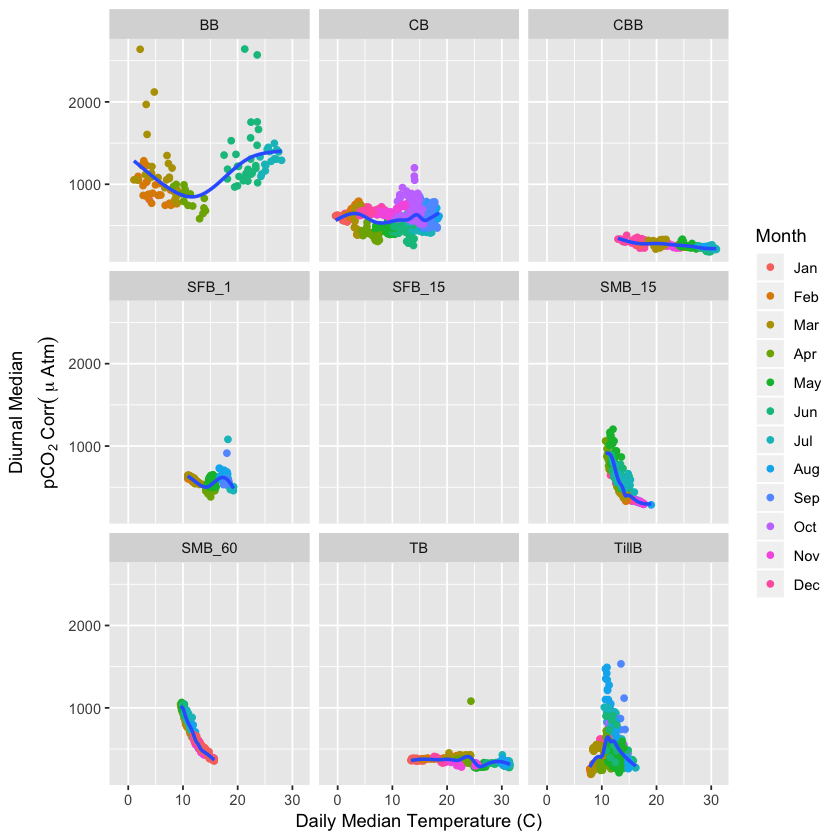

In [57]:
ggplot(daily_data, aes(Temp_m, CO2Corr_m)) + 
 geom_point(aes(color = Month)) + 
 geom_smooth(se=FALSE) +
 ylab(expression(atop("Diurnal Median", pCO[2]~Corr(~mu~Atm)))) +
 xlab('Daily Median Temperature (C)') +
 facet_wrap(~WaterBody, ncol=3)
